# Flood Prediction Machine Model Training

## EDA

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(r"data/train.csv")

### Get overview of data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1117957 entries, 0 to 1117956
Data columns (total 22 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   id                               1117957 non-null  int64  
 1   MonsoonIntensity                 1117957 non-null  int64  
 2   TopographyDrainage               1117957 non-null  int64  
 3   RiverManagement                  1117957 non-null  int64  
 4   Deforestation                    1117957 non-null  int64  
 5   Urbanization                     1117957 non-null  int64  
 6   ClimateChange                    1117957 non-null  int64  
 7   DamsQuality                      1117957 non-null  int64  
 8   Siltation                        1117957 non-null  int64  
 9   AgriculturalPractices            1117957 non-null  int64  
 10  Encroachments                    1117957 non-null  int64  
 11  IneffectiveDisasterPreparedness  1117957 non-null 

Note: there is an ```id``` column of type ```int64```, 20 features of type ```int64```, and the target variable ```FloodProbability``` which is of type ```float64```.

In [4]:
df.head()

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,0,5,8,5,8,6,4,4,3,3,...,5,3,3,5,4,7,5,7,3,0.445
1,1,6,7,4,4,8,8,3,5,4,...,7,2,0,3,5,3,3,4,3,0.450
2,2,6,5,6,7,3,7,1,5,4,...,7,3,7,5,6,8,2,3,3,0.530
3,3,3,4,6,5,4,8,4,7,6,...,2,4,7,4,4,6,5,7,5,0.535
4,4,5,3,2,6,4,4,3,3,3,...,2,2,6,6,4,1,2,3,5,0.415


#### Check number of unique values in each column (except target)

In [5]:
pd.DataFrame({
    'Column Name': df.columns,
    'Number of Unique Values': [df[col].nunique() for col in df.columns]
})


,Column Name,Number of Unique Values
0,id,1117957
1,MonsoonIntensity,17
2,TopographyDrainage,19
3,RiverManagement,17
4,Deforestation,18
5,Urbanization,18
6,ClimateChange,18
7,DamsQuality,17
8,Siltation,17
9,AgriculturalPractices,17


In [6]:
df.describe()

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
count,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,...,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06
mean,5.589780e+05,4.921450e+00,4.926671e+00,4.955322e+00,4.942240e+00,4.942517e+00,4.934093e+00,4.955878e+00,4.927791e+00,4.942619e+00,...,4.946893e+00,4.953999e+00,4.931376e+00,4.929032e+00,4.925907e+00,4.927520e+00,4.950859e+00,4.940587e+00,4.939004e+00,5.044803e-01
std,3.227265e+05,2.056387e+00,2.093879e+00,2.072186e+00,2.051689e+00,2.083391e+00,2.057742e+00,2.083063e+00,2.065992e+00,2.068545e+00,...,2.072333e+00,2.088899e+00,2.078287e+00,2.082395e+00,2.064813e+00,2.074176e+00,2.068696e+00,2.081123e+00,2.090350e+00,5.102610e-02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.850000e-01
25%,2.794890e+05,3.000000e+00,3.000000e+00,4.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,...,4.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,4.700000e-01
50%,5.589780e+05,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,...,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.050000e-01
75%,8.384670e+05,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,...,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,5.400000e-01
max,1.117956e+06,1.600000e+01,1.800000e+01,1.600000e+01,1.700000e+01,1.700000e+01,1.700000e+01,1.600000e+01,1.600000e+01,1.600000e+01,...,1.700000e+01,1.700000e+01,1.600000e+01,1.600000e+01,1.700000e+01,1.800000e+01,1.900000e+01,1.600000e+01,1.600000e+01,7.250000e-01


#### Verify the range of int values contained in each feature column

In [7]:
features = [col for col in df.columns if col not in ["id", "FloodProbability"]]
features

['MonsoonIntensity',
 'TopographyDrainage',
 'RiverManagement',
 'Deforestation',
 'Urbanization',
 'ClimateChange',
 'DamsQuality',
 'Siltation',
 'AgriculturalPractices',
 'Encroachments',
 'IneffectiveDisasterPreparedness',
 'DrainageSystems',
 'CoastalVulnerability',
 'Landslides',
 'Watersheds',
 'DeterioratingInfrastructure',
 'PopulationScore',
 'WetlandLoss',
 'InadequatePlanning',
 'PoliticalFactors']

In [8]:
unexpected_ranges = []
for col in features[:2]:
    expected_range = set(range(0, max(df[col]) + 1))
    if set(df[col]) - set(expected_range):
        unexpected_ranges.append(col)

if unexpected_ranges:
    print(f"{len(unexpected_ranges)} columns contained unexpected int values: \n{'\n'.join(unexpected_range)}")
else:
    print(f"All features have int values that fall between the minimum and maximum of their respective int values, with full coverage of all possible int values.")

All features have int values that fall between the minimum and maximum of their respective int values, with full coverage of all possible int values.


### Check for missing values, duplicates

In [9]:
print(f"Number of missing values = {df.isna().sum().sum()}")

Number of missing values = 0


The only column where duplicate values would be unexpected is the ```id``` column:

In [10]:
dup = df["id"].duplicated(keep=False).sum()
print(f"Number of duplicate ids = {dup}")

Number of duplicate ids = 0


### Cleaning

No potential issues were found in the dataset. There is nothing that requires cleaning.

### Distribution and correlation analysis

In [11]:
import seaborn as sns

C:\Users\dvfit\AppData\Local\Temp\ipykernel_23372\1074063381.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right");


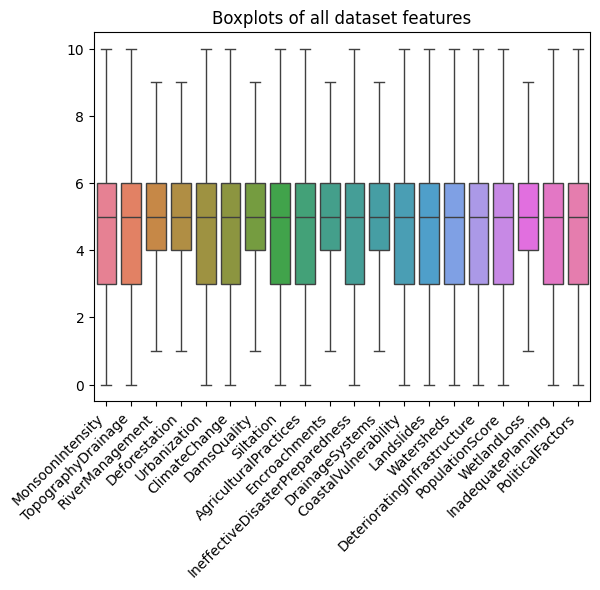

In [12]:
ax = sns.boxplot(
    data=df[features],
    showfliers=False 
);
ax.set_title("Boxplots of all dataset features");
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right");

As already indicated in the summary statistics of the dataframe, the median is exactly 5 for all features, which is due to how the dataset was originally generated.

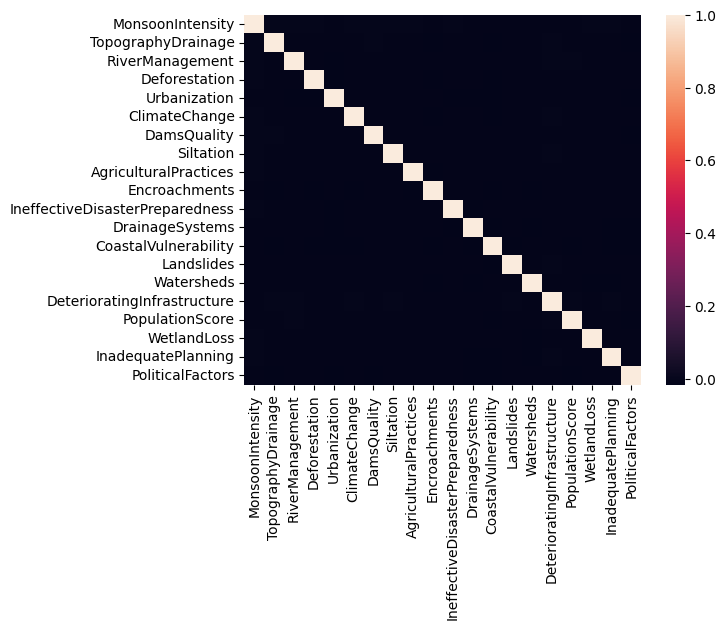

In [13]:
sns.heatmap(df[features].corr(), annot=False);

There is no correlation between any of the features.

In [14]:
df[features].corrwith(df["FloodProbability"]).abs()

MonsoonIntensity                   0.189098
TopographyDrainage                 0.187635
RiverManagement                    0.187131
Deforestation                      0.184001
Urbanization                       0.180861
ClimateChange                      0.184761
DamsQuality                        0.187996
Siltation                          0.186789
AgriculturalPractices              0.183366
Encroachments                      0.178841
IneffectiveDisasterPreparedness    0.183109
DrainageSystems                    0.179305
CoastalVulnerability               0.177774
Landslides                         0.185346
Watersheds                         0.181907
DeterioratingInfrastructure        0.190007
PopulationScore                    0.185890
WetlandLoss                        0.183396
InadequatePlanning                 0.180968
PoliticalFactors                   0.182417
dtype: float64

The correlation between the target and each feature is similar for all features. It is not possible to decide to remove any of the features based on the correlation.

## Model Training and Parameter Tuning

### Split dataset

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

In [17]:
y_train = df_train["FloodProbability"].values
y_val = df_val["FloodProbability"].values
y_test = df_test["FloodProbability"].values

In [18]:
del df_train["FloodProbability"]
del df_val["FloodProbability"]
del df_test["FloodProbability"]

In [19]:
X_train = df_train[features].values
X_val = df_val[features].values
X_test = df_test[features].values

### Train LinearRegression model

In [20]:
from sklearn import linear_model

In [21]:
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [22]:
from sklearn.metrics import root_mean_squared_error
import numpy as np

In [23]:
y_pred = reg.predict(X_val)

In [24]:
rmse_reg = root_mean_squared_error(y_val, y_pred)
print(f"RMSE for {type(reg).__name__} model: {rmse_reg:.5f}")

RMSE for LinearRegression model: 0.02007


In [25]:
rmse_scores_comparison = [
    {"model type": type(reg).__name__, "rmse": rmse_reg}
]

### Train Ridge model

In [26]:
from sklearn.linear_model import Ridge

In [27]:
alpha_values = [10**i for i in range(-6, 6)]
rmse_scores = []
for alpha in alpha_values:
    rdg = Ridge(alpha=alpha)
    rdg.fit(X_train, y_train)
    y_pred = rdg.predict(X_val)
    rmse = root_mean_squared_error(y_val, y_pred)
    rmse_scores.append({"alpha": alpha, "rmse": rmse})


In [28]:
rmse_scores_df = pd.DataFrame(rmse_scores)
rmse_scores_df

,alpha,rmse
0,0.000001,0.020072
1,0.000010,0.020072
2,0.000100,0.020072
3,0.001000,0.020072
4,0.010000,0.020072
5,0.100000,0.020072
6,1.000000,0.020072
7,10.000000,0.020072
8,100.000000,0.020072
9,1000.000000,0.020072


In [29]:
lowest_rmse = rmse_scores_df.iloc[rmse_scores_df["rmse"].idxmin(), :]
lowest_rmse

alpha    0.000001
rmse     0.020072
Name: 0, dtype: float64

In [30]:
rmse_rdg = lowest_rmse["rmse"]
print(f"RMSE for {type(rdg).__name__} model: {rmse_rdg:.5f}")

RMSE for Ridge model: 0.02007


In [31]:
rmse_scores_comparison.append(
    {"model type": type(rdg).__name__, "rmse": rmse_rdg}
)

The alpha has no noticeable influence on the RMSE values. Up to the value 1000, they are all nearly identical to the one obtained for the LinearRegression model (only slightly lower).

Higher values of alpha cause an increase in RMSE, therefore the lowest value tested, 0.000001, will be used in case this model is retained.

### Train DecisionTreeRegressor model

In [32]:
from sklearn.tree import DecisionTreeRegressor

In [33]:
max_depth_values = [5, 10, 20, 50, 100]
min_samples_leaf_values = [0.0005, 0.0001, 0.00005, 0.00001, 0.000001]
rmse_scores = []
for max_depth in max_depth_values:
    for min_samples_leaf in min_samples_leaf_values:
        dtr = DecisionTreeRegressor(max_depth=max_depth, min_samples_leaf=min_samples_leaf)
        dtr.fit(X_train, y_train)
        y_pred = dtr.predict(X_val)
        rmse = root_mean_squared_error(y_val, y_pred)
        rmse_scores.append(
            {"max_depth": max_depth, 
             "min_samples_leaf": min_samples_leaf, 
             "rmse": rmse}
        )


In [34]:
rmse_scores_df = pd.DataFrame(rmse_scores)
rmse_scores_df_styler = rmse_scores_df.style.background_gradient(
    subset=["rmse"],
    cmap='RdYlGn_r'  # Reversed Red-Yellow-Green: green = low, red = high
)
rmse_scores_df_styler

,max_depth,min_samples_leaf,rmse
0,5,0.000500,0.047831
1,5,0.000100,0.047831
2,5,0.000050,0.047831
3,5,0.000010,0.047831
4,5,0.000001,0.047831
5,10,0.000500,0.044475
6,10,0.000100,0.044436
7,10,0.000050,0.044438
8,10,0.000010,0.044439
9,10,0.000001,0.044439


In [35]:
lowest_rmse = rmse_scores_df.iloc[rmse_scores_df["rmse"].idxmin(), :]
lowest_rmse

max_depth           20.000000
min_samples_leaf     0.000050
rmse                 0.042315
Name: 12, dtype: float64

In [36]:
rmse_dtr = lowest_rmse["rmse"]
print(f"RMSE for {type(dtr).__name__} model: {rmse_dtr:.5f}")

RMSE for DecisionTreeRegressor model: 0.04231


In [37]:
rmse_scores_comparison.append(
    {"model type": type(dtr).__name__, "rmse": rmse_dtr}
)

The lowest RMSE value is 0.042315 and is obtained with a ```max_depth``` of 20, and a ```min_samples_leaf``` value of 0.00005.

However, that value is significantly higher than the one obtained with the simple linear regression model, which indicates that either a DecisionTreeRegressor might not be the best choice of model, or further parameter tuning should be carried out.

### Train XGBoost model

In [38]:
import xgboost as xgb
import matplotlib.pyplot as plt

In [39]:
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

[0]	train-rmse:0.05026	val-rmse:0.05036
[10]	train-rmse:0.04408	val-rmse:0.04430
[20]	train-rmse:0.03953	val-rmse:0.03986
[30]	train-rmse:0.03599	val-rmse:0.03641
[40]	train-rmse:0.03324	val-rmse:0.03372
[50]	train-rmse:0.03101	val-rmse:0.03154
[60]	train-rmse:0.02916	val-rmse:0.02972
[70]	train-rmse:0.02762	val-rmse:0.02822
[80]	train-rmse:0.02633	val-rmse:0.02695
[90]	train-rmse:0.02525	val-rmse:0.02589
[99]	train-rmse:0.02443	val-rmse:0.02509


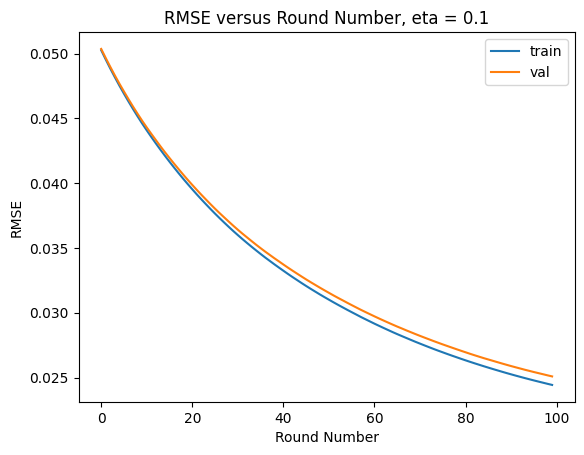

[0]	train-rmse:0.04958	val-rmse:0.04969
[10]	train-rmse:0.03924	val-rmse:0.03954
[20]	train-rmse:0.03321	val-rmse:0.03361
[30]	train-rmse:0.02929	val-rmse:0.02977
[40]	train-rmse:0.02658	val-rmse:0.02712
[50]	train-rmse:0.02471	val-rmse:0.02528
[60]	train-rmse:0.02343	val-rmse:0.02401
[70]	train-rmse:0.02258	val-rmse:0.02318
[80]	train-rmse:0.02201	val-rmse:0.02261
[90]	train-rmse:0.02162	val-rmse:0.02223
[99]	train-rmse:0.02139	val-rmse:0.02200


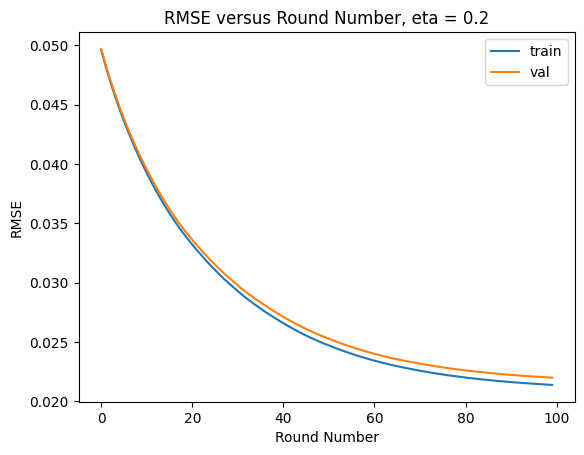

[0]	train-rmse:0.04896	val-rmse:0.04909
[10]	train-rmse:0.03572	val-rmse:0.03606
[20]	train-rmse:0.02950	val-rmse:0.02995
[30]	train-rmse:0.02597	val-rmse:0.02648
[40]	train-rmse:0.02404	val-rmse:0.02458
[50]	train-rmse:0.02299	val-rmse:0.02354
[60]	train-rmse:0.02242	val-rmse:0.02299
[70]	train-rmse:0.02210	val-rmse:0.02268
[80]	train-rmse:0.02192	val-rmse:0.02252
[90]	train-rmse:0.02180	val-rmse:0.02241
[99]	train-rmse:0.02173	val-rmse:0.02235


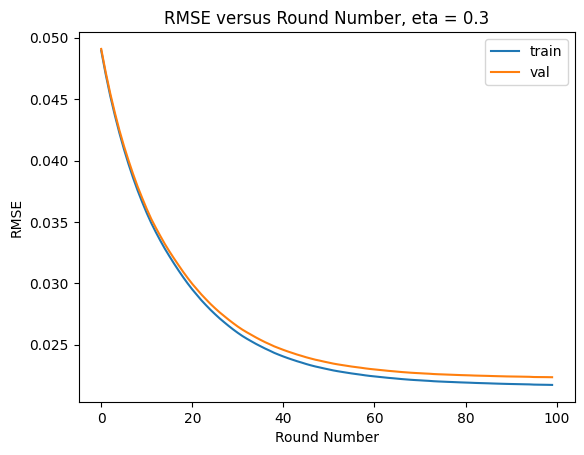

[0]	train-rmse:0.04843	val-rmse:0.04857
[10]	train-rmse:0.03335	val-rmse:0.03371
[20]	train-rmse:0.02741	val-rmse:0.02791
[30]	train-rmse:0.02474	val-rmse:0.02524
[40]	train-rmse:0.02358	val-rmse:0.02411
[50]	train-rmse:0.02300	val-rmse:0.02354
[60]	train-rmse:0.02277	val-rmse:0.02333
[70]	train-rmse:0.02259	val-rmse:0.02316
[80]	train-rmse:0.02247	val-rmse:0.02307
[90]	train-rmse:0.02233	val-rmse:0.02296
[99]	train-rmse:0.02214	val-rmse:0.02280


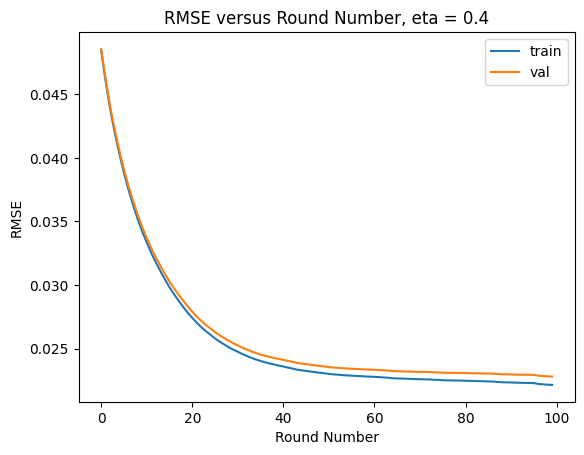

[0]	train-rmse:0.04797	val-rmse:0.04812
[10]	train-rmse:0.03179	val-rmse:0.03222
[20]	train-rmse:0.02658	val-rmse:0.02709
[30]	train-rmse:0.02476	val-rmse:0.02529
[40]	train-rmse:0.02409	val-rmse:0.02463
[50]	train-rmse:0.02377	val-rmse:0.02434
[60]	train-rmse:0.02338	val-rmse:0.02397
[70]	train-rmse:0.02313	val-rmse:0.02376
[80]	train-rmse:0.02287	val-rmse:0.02352
[90]	train-rmse:0.02262	val-rmse:0.02332
[99]	train-rmse:0.02230	val-rmse:0.02302


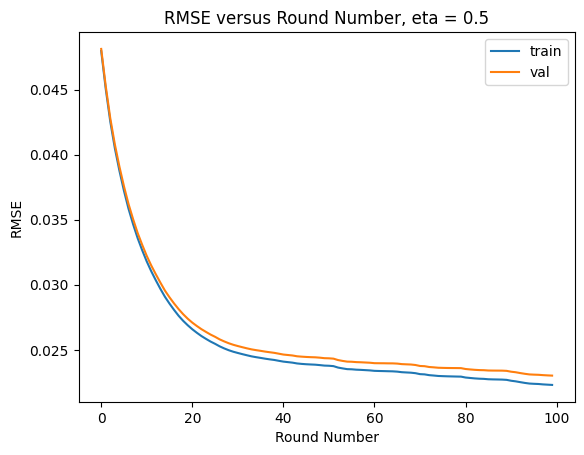

In [40]:
eta_values = [0.1, 0.2, 0.3, 0.4, 0.5]

watchlist = [(dtrain, "train"), (dval, "val")]
rmse_scores = []

for eta in eta_values:
    evals_result = {}
    xgb_params = {
        "eta": eta,
        "max_depth": 6,
        "min_child_weight": 1,
        "objective": "reg:squarederror",
        "nthread": 8,
        "seed": 1,
        "verbosity": 1,
    }    
    model = xgb.train(xgb_params, dtrain, num_boost_round=100, verbose_eval=10, evals=watchlist, evals_result=evals_result)
    plt.plot(evals_result["train"]["rmse"])
    plt.plot(evals_result["val"]["rmse"])
    
    plt.title(f"RMSE versus Round Number, eta = {eta}")
    plt.xlabel("Round Number")
    plt.ylabel("RMSE")
    plt.legend(["train", "val"])
    
    plt.show()

    rmse_scores.append({"eta": eta, "rmse": min(evals_result["val"]["rmse"])})

In [41]:
rmse_scores_df = pd.DataFrame(rmse_scores)
rmse_scores_df_styler = rmse_scores_df.style.background_gradient(
    subset=["rmse"],
    cmap='RdYlGn_r'  # Reversed Red-Yellow-Green: green = low, red = high
)
rmse_scores_df_styler

,eta,rmse
0,0.100000,0.025089
1,0.200000,0.021998
2,0.300000,0.022354
3,0.400000,0.022798
4,0.500000,0.023016


In [42]:
lowest_rmse = rmse_scores_df.iloc[rmse_scores_df["rmse"].idxmin(), :]
lowest_rmse

eta     0.200000
rmse    0.021998
Name: 1, dtype: float64

In [43]:
rmse_xgb = lowest_rmse["rmse"]
print(f"RMSE for {type(model).__name__} model: {rmse_xgb:.5f}")

RMSE for Booster model: 0.02200


In [44]:
rmse_scores_comparison.append(
    {"model type": type(model).__name__, "rmse": rmse_xgb}
)

Between the different ```eta``` values tested, the value 0.2 resulted in the lowest RMSE value after 100 rounds.

## Final Model Selection and Training

### Model selection

In [45]:
rmse_scores_comparison = pd.DataFrame(rmse_scores_comparison)
rmse_scores_comparison

rmse_scores_comparison_styler = rmse_scores_comparison.style.background_gradient(
    subset=["rmse"],
    cmap='RdYlGn_r'  # Reversed Red-Yellow-Green: green = low, red = high
)
rmse_scores_comparison_styler

,model type,rmse
0,LinearRegression,0.020072
1,Ridge,0.020072
2,DecisionTreeRegressor,0.042315
3,Booster,0.021998


In [46]:
lowest_rmse = rmse_scores_comparison.iloc[rmse_scores_comparison["rmse"].idxmin(), :]
print(f"The best performing model among those tested is the {lowest_rmse["model type"]} model.")

The best performing model among those tested is the LinearRegression model.


### Model training

We will train the LinearRegression model using the full_train dataframe.

In [47]:
y_full_train = df_full_train["FloodProbability"].values
del df_full_train["FloodProbability"]
X_full_train = df_full_train[features].values

reg_final = linear_model.LinearRegression()
reg_final.fit(X_full_train, y_full_train)

y_pred = reg.predict(X_test)
rmse_reg_final = root_mean_squared_error(y_test, y_pred)
print(f"RMSE for {type(reg_final).__name__} model: {rmse_reg_final:.5f}")

RMSE for LinearRegression model: 0.02008


The RMSE value obtained with the test data is very close to the value obtained on the validation data, therefore the final model is behaving as expected.

In [48]:
test_record = X_test[0]
test_record

array([7, 5, 8, 4, 8, 4, 8, 4, 3, 7, 3, 5, 7, 4, 7, 2, 3, 6, 7, 2])

In [49]:
reg.predict([test_record])[0]

np.float64(0.533955159245879)